In [1]:
import pandas as pd

In [4]:
df = pd.read_parquet("/Users/alexander.girardet/Code/Personal/projects/rightmove_project/rightmove/backend/app/data.parquet")

In [6]:
df.head()

,id,bedrooms,bathrooms,summary,listingUpdate,price,firstVisibleDate,feature_list,longitude,latitude,text,price_category,listingUpdateReason,walk_score
0,144494732,3,2.0,Property Reference: 1981340.We are proud to of...,"{'listingUpdateDate': '2024-02-08T10:43:04Z', ...",13200.000000,2024-02-08 10:37:35+00:00,"[No Agent Fees, Property Reference Number: 198...",-2.126043,57.171738,"No Agent Fees, Property Reference Number: 1981...",Average,new,50.0
1,144519602,2,1.0,Executive two bedroom apartment. Upper floor w...,"{'listingUpdateDate': '2024-02-08T16:07:03Z', ...",10740.000000,2024-02-08 16:01:18+00:00,"[* EPC Rating: C, * Deposit: £500, * Gas Centr...",-2.123211,57.157930,"* EPC Rating: C, * Deposit: £500, * Gas Centra...",Average,new,35.0
2,142696793,2,1.0,Two bedroom ground floor flat within modern de...,"{'listingUpdateDate': '2024-02-08T11:27:50Z', ...",7800.000000,2023-12-05 11:50:19+00:00,"[Gas Central Heating, Double Glazing, Shower, ...",-2.094720,57.164620,"Gas Central Heating, Double Glazing, Shower, F...",Cheap,price_reduced,55.0
3,144520694,0,1.0,Are you looking for something more than just a...,"{'listingUpdateDate': '2024-02-08T16:24:07Z', ...",7821.428571,2024-02-08 16:18:51+00:00,"[A choice of studio, one bedroom and co-living...",-2.102780,57.147460,"A choice of studio, one bedroom and co-living ...",Cheap,new,99.0
4,144355817,2,1.0,Property Reference: 1977012.Availability from:...,"{'listingUpdateDate': '2024-02-08T23:04:58Z', ...",9480.000000,2024-02-04 17:09:21+00:00,"[No Agent Fees, Students Can Enquire, Property...",-2.097058,57.145860,"No Agent Fees, Students Can Enquire, Property ...",Average,price_reduced,86.0


# Get Data

In [2]:
from pymongo import MongoClient

client = MongoClient("mongodb://localhost:27017/") # Hosted with Docker

db = client["rightmove"]

# Access collection
collection = db["properties"]

fields = {"price.amount": 1, "price.frequency": 1, "firstVisibleDate": 1, "bedrooms": 1, "bathrooms": 1, "listingUpdate": 1, 'location': 1}
query = {}

# Fetch data from the collection
data = collection.find(query, fields)

# Convert to Pandas DataFrame
df = pd.DataFrame(list(data))

## Exploratory Data Analysis

In [3]:
df['update_reason'] = df['listingUpdate'].apply(lambda x: x['listingUpdateReason'])
df['update_date'] = df['listingUpdate'].apply(lambda x: x['listingUpdateDate'])

## Process data

In [4]:
df['date_updated'] =  pd.to_datetime(df['update_date'])

In [5]:
df

,_id,bedrooms,bathrooms,location,listingUpdate,price,firstVisibleDate,update_reason,update_date,date_updated
0,656dfa586037a12e52f660b6,2,1.0,"{'latitude': 57.156601, 'longitude': -2.10075}","{'listingUpdateReason': 'new', 'listingUpdateD...","{'amount': 700, 'frequency': 'monthly'}",2023-12-01T13:57:16Z,new,2023-12-01T14:03:03Z,2023-12-01 14:03:03+00:00
1,656dfa586037a12e52f660b7,2,1.0,"{'latitude': 57.16631, 'longitude': -2.11688}","{'listingUpdateReason': 'price_reduced', 'list...","{'amount': 500, 'frequency': 'monthly'}",2023-10-06T16:31:02Z,price_reduced,2023-12-01T14:29:25Z,2023-12-01 14:29:25+00:00
2,656dfa586037a12e52f660b8,2,1.0,"{'latitude': 57.15214, 'longitude': -2.0856}","{'listingUpdateReason': 'price_reduced', 'list...","{'amount': 850, 'frequency': 'monthly'}",2023-11-08T22:00:52Z,price_reduced,2023-12-01T16:39:08Z,2023-12-01 16:39:08+00:00
3,656dfa586037a12e52f660b9,2,1.0,"{'latitude': 57.14584, 'longitude': -2.098261}","{'listingUpdateReason': 'price_reduced', 'list...","{'amount': 750, 'frequency': 'monthly'}",2023-11-15T23:07:42Z,price_reduced,2023-11-29T21:13:26Z,2023-11-29 21:13:26+00:00
4,656dfa586037a12e52f660ba,2,2.0,"{'latitude': 57.15393, 'longitude': -2.09585}","{'listingUpdateReason': 'new', 'listingUpdateD...","{'amount': 850, 'frequency': 'monthly'}",2023-11-30T10:08:43Z,new,2023-11-30T10:14:04Z,2023-11-30 10:14:04+00:00
...,...,...,...,...,...,...,...,...,...,...
14683,65749110d83a1b4c1f493d8b,2,1.0,"{'latitude': 53.818333, 'longitude': -1.601612}","{'listingUpdateReason': 'new', 'listingUpdateD...","{'amount': 1000, 'frequency': 'monthly'}",2023-12-06T17:13:27Z,new,2023-12-06T17:18:50Z,2023-12-06 17:18:50+00:00
14684,65749110d83a1b4c1f493d8c,1,1.0,"{'latitude': 53.723388, 'longitude': -1.861146}","{'listingUpdateReason': 'new', 'listingUpdateD...","{'amount': 450, 'frequency': 'monthly'}",2023-12-06T17:08:54Z,new,2023-12-06T17:14:06Z,2023-12-06 17:14:06+00:00
14685,65749110d83a1b4c1f493d8d,2,1.0,"{'latitude': 53.715498, 'longitude': -1.875566}","{'listingUpdateReason': 'new', 'listingUpdateD...","{'amount': 700, 'frequency': 'monthly'}",2023-12-06T17:01:52Z,new,2023-12-06T17:07:04Z,2023-12-06 17:07:04+00:00
14686,65749110d83a1b4c1f493d8e,2,2.0,"{'latitude': 53.983875, 'longitude': -1.540532}","{'listingUpdateReason': 'new', 'listingUpdateD...","{'amount': 2400, 'frequency': 'monthly'}",2023-12-09T15:15:53Z,new,2023-12-09T15:21:04Z,2023-12-09 15:21:04+00:00


In [6]:
def convert_frequencies(x):
    frequency = x['frequency']
    price = x['amount']
    
    if frequency == 'monthly':
        return price * 12
    elif frequency == 'weekly':
        return (price / 7) * 365
    elif frequency == 'daily':
        return price * 365
    elif frequency == 'quarterly':
        return price * 4
    else: # Yearly
        return price

df['yearly_price'] = df['price'].apply(convert_frequencies)

df = df.reset_index(drop=True)

### Drop outliers

<Axes: >

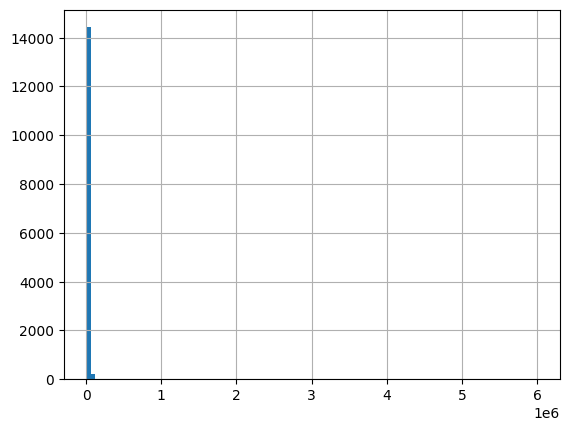

In [7]:
df['yearly_price'].hist(bins=100)

In [12]:
from scipy.stats import zscore
import matplotlib.pyplot as plt

### Dropping outliers of price three standards of deviation above the mean.

In [13]:
df['price_zscore'] = zscore(df['yearly_price'])

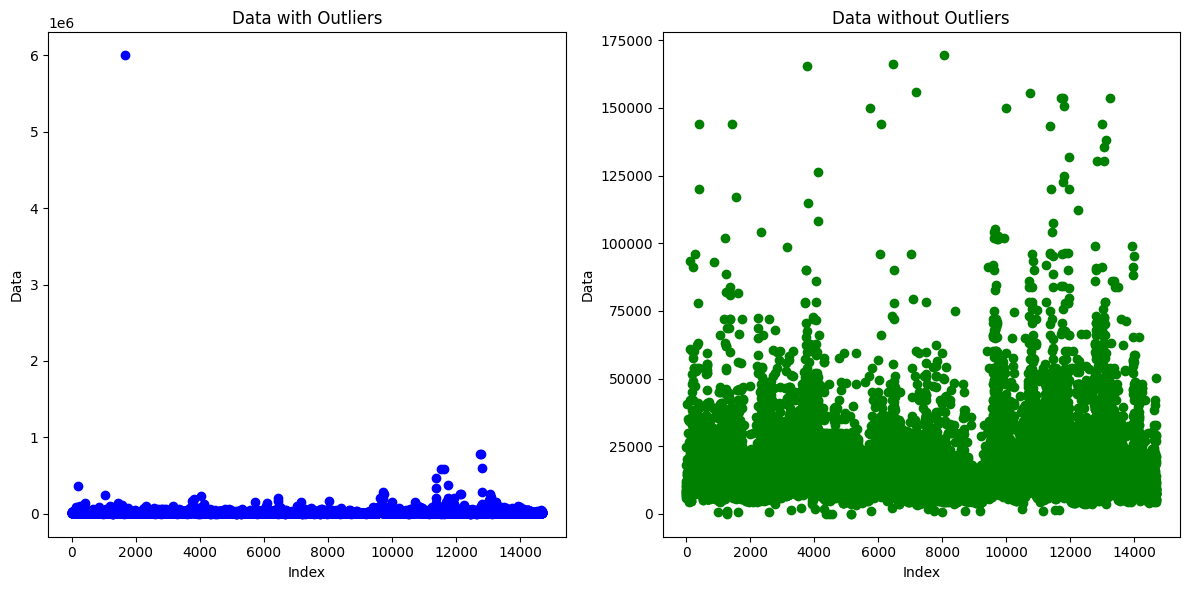

In [14]:
threshold = 3

df_no_outliers = df[df['price_zscore'].abs() <= threshold]

# Plotting
plt.figure(figsize=(12, 6))

plt.subplot(1, 2, 1)
plt.scatter(df.index, df['yearly_price'], color='blue')
plt.title('Data with Outliers')
plt.xlabel('Index')
plt.ylabel('Data')

plt.subplot(1, 2, 2)
plt.scatter(df_no_outliers.index, df_no_outliers['yearly_price'], color='green')
plt.title('Data without Outliers')
plt.xlabel('Index')
plt.ylabel('Data')

plt.tight_layout()
plt.show()

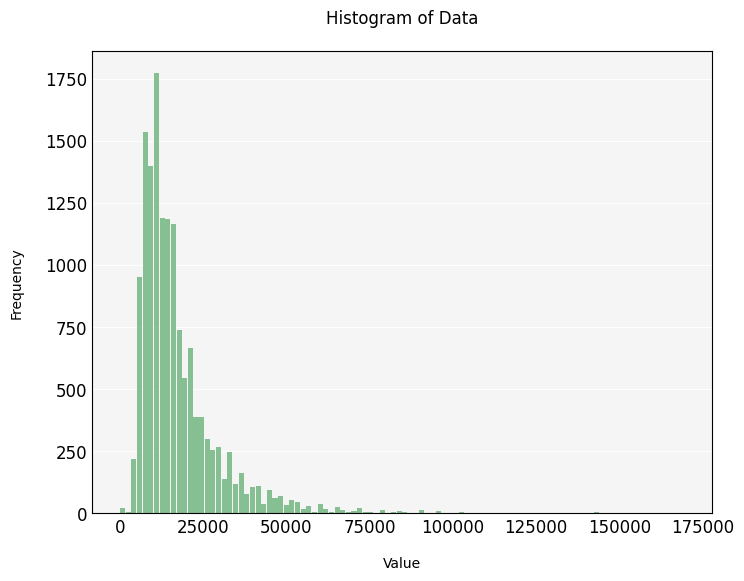

In [15]:
ax = df_no_outliers['yearly_price'].hist(bins=100, grid=False, figsize=(8, 6), color='#86bf91', zorder=2, rwidth=0.9)

# Matplotlib plt functions for formatting
ax.set_title('Histogram of Data', pad=20)
ax.set_xlabel('Value', labelpad=15)
ax.set_ylabel('Frequency', labelpad=15)

# Customizing the grid
ax.grid(axis='y', color='white', linestyle='-', linewidth=0.7)
ax.set_facecolor('#f5f5f5')

# Customizing the ticks
ax.tick_params(axis='both', which='both', length=0)
plt.xticks(fontsize=12)
plt.yticks(fontsize=12)

# Show the plot
plt.show()

In [16]:
import pandas as pd
import matplotlib.pyplot as plt
import matplotlib.dates as mdates
from datetime import datetime, timedelta
import numpy as np

# Plotting 
df_no_outliers["date"] = df_no_outliers["date_updated"].dt.date


/var/folders/6d/8tvwdn1n6j924gfrc5bg5h5rsn3bgj/T/ipykernel_1551/1082017211.py:8: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_no_outliers["date"] = df_no_outliers["date_updated"].dt.date


In [17]:
df_no_outliers.set_index("date_updated", inplace=True)

In [18]:
df_no_outliers.info()

<class 'pandas.core.frame.DataFrame'>
DatetimeIndex: 14659 entries, 2023-12-01 14:03:03+00:00 to 2023-12-07 11:09:34+00:00
Data columns (total 12 columns):
 #   Column            Non-Null Count  Dtype  
---  ------            --------------  -----  
 0   _id               14659 non-null  object 
 1   bedrooms          14659 non-null  int64  
 2   bathrooms         13761 non-null  float64
 3   location          14659 non-null  object 
 4   listingUpdate     14659 non-null  object 
 5   price             14659 non-null  object 
 6   firstVisibleDate  14659 non-null  object 
 7   update_reason     14655 non-null  object 
 8   update_date       14655 non-null  object 
 9   yearly_price      14659 non-null  float64
 10  price_zscore      14659 non-null  float64
 11  date              14655 non-null  object 
dtypes: float64(3), int64(1), object(8)
memory usage: 1.5+ MB


In [19]:
resampled_df = df_no_outliers[['yearly_price']].resample('M').mean()

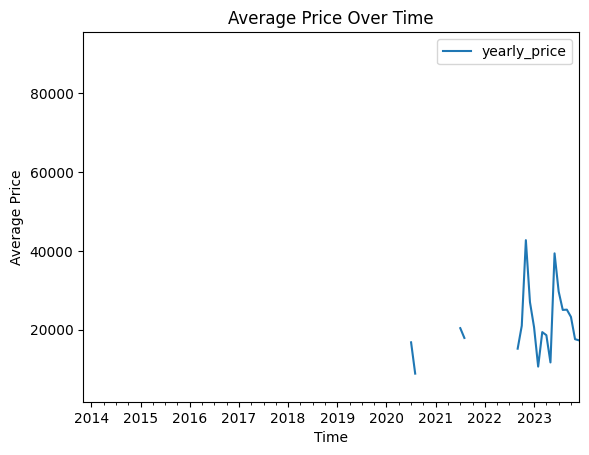

In [20]:
resampled_df.plot(y='yearly_price', kind='line')
plt.title('Average Price Over Time')
plt.ylabel('Average Price')
plt.xlabel('Time')
plt.show()

# Preprocessing

## Fetch Data

In [21]:
from pymongo import MongoClient

client = MongoClient("mongodb://localhost:27017/") # Hosted with Docker

db = client["rightmove"]

# Access collection
collection = db["properties"]

fields = {"price.amount": 1, "price.frequency": 1, "firstVisibleDate": 1, "bedrooms": 1, "bathrooms": 1, "listingUpdate": 1, 'location': 1}
query = {}

# Fetch data from the collection
data = collection.find(query, fields)

# Convert to Pandas DataFrame
df = pd.DataFrame(list(data))

## Preprocess

In [22]:
def convert_frequencies(x):
    frequency = x['frequency']
    price = x['amount']
    
    if frequency == 'monthly':
        return price * 12
    elif frequency == 'weekly':
        return (price / 7) * 365
    elif frequency == 'daily':
        return price * 365
    elif frequency == 'quarterly':
        return price * 4
    else: # Yearly
        return price

df['yearly_price'] = df['price'].apply(convert_frequencies)

df = df.reset_index(drop=True)

In [23]:
df['longitude'] = df['location'].apply(lambda x: x['longitude'])
df['latitude'] = df['location'].apply(lambda x: x['latitude'])

df['update_reason'] = df['listingUpdate'].apply(lambda x: x['listingUpdateReason'])
df['update_date'] = df['listingUpdate'].apply(lambda x: x['listingUpdateDate'])

df['date_updated'] =  pd.to_datetime(df['update_date'])

### Drop outliers

In [24]:
df['price_zscore'] = zscore(df['yearly_price'])

In [25]:
threshold = 3

df = df[df['price_zscore'].abs() <= threshold]

In [28]:
df.head()

,_id,bedrooms,bathrooms,location,listingUpdate,price,firstVisibleDate,yearly_price,longitude,latitude,update_reason,update_date,date_updated,price_zscore
0,656dfa586037a12e52f660b6,2,1.0,"{'latitude': 57.156601, 'longitude': -2.10075}","{'listingUpdateReason': 'new', 'listingUpdateD...","{'amount': 700, 'frequency': 'monthly'}",2023-12-01T13:57:16Z,8400.0,-2.100750,57.156601,new,2023-12-01T14:03:03Z,2023-12-01 14:03:03+00:00,-0.191189
1,656dfa586037a12e52f660b7,2,1.0,"{'latitude': 57.16631, 'longitude': -2.11688}","{'listingUpdateReason': 'price_reduced', 'list...","{'amount': 500, 'frequency': 'monthly'}",2023-10-06T16:31:02Z,6000.0,-2.116880,57.166310,price_reduced,2023-12-01T14:29:25Z,2023-12-01 14:29:25+00:00,-0.236069
2,656dfa586037a12e52f660b8,2,1.0,"{'latitude': 57.15214, 'longitude': -2.0856}","{'listingUpdateReason': 'price_reduced', 'list...","{'amount': 850, 'frequency': 'monthly'}",2023-11-08T22:00:52Z,10200.0,-2.085600,57.152140,price_reduced,2023-12-01T16:39:08Z,2023-12-01 16:39:08+00:00,-0.157529
3,656dfa586037a12e52f660b9,2,1.0,"{'latitude': 57.14584, 'longitude': -2.098261}","{'listingUpdateReason': 'price_reduced', 'list...","{'amount': 750, 'frequency': 'monthly'}",2023-11-15T23:07:42Z,9000.0,-2.098261,57.145840,price_reduced,2023-11-29T21:13:26Z,2023-11-29 21:13:26+00:00,-0.179969
4,656dfa586037a12e52f660ba,2,2.0,"{'latitude': 57.15393, 'longitude': -2.09585}","{'listingUpdateReason': 'new', 'listingUpdateD...","{'amount': 850, 'frequency': 'monthly'}",2023-11-30T10:08:43Z,10200.0,-2.095850,57.153930,new,2023-11-30T10:14:04Z,2023-11-30 10:14:04+00:00,-0.157529


# Visualizations

In [29]:
df["date"] = df["date_updated"].dt.date

In [35]:
df['listingUpdateReason'] = df['listingUpdate'].apply(lambda x: x['listingUpdateReason'])

In [50]:
df['listingUpdateReason'].value_counts()

listingUpdateReason
new              11184
price_reduced     3471
Name: count, dtype: int64

In [38]:
new_listings = df[df['listingUpdateReason'] == 'new']

In [40]:
new_listings.set_index("date", inplace=True)

In [42]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Index: 14659 entries, 0 to 14687
Data columns (total 16 columns):
 #   Column               Non-Null Count  Dtype              
---  ------               --------------  -----              
 0   _id                  14659 non-null  object             
 1   bedrooms             14659 non-null  int64              
 2   bathrooms            13761 non-null  float64            
 3   location             14659 non-null  object             
 4   listingUpdate        14659 non-null  object             
 5   price                14659 non-null  object             
 6   firstVisibleDate     14659 non-null  object             
 7   yearly_price         14659 non-null  float64            
 8   longitude            14659 non-null  float64            
 9   latitude             14659 non-null  float64            
 10  update_reason        14655 non-null  object             
 11  update_date          14655 non-null  object             
 12  date_updated         14

In [48]:
import pandas as pd
import matplotlib.pyplot as plt

# Assuming df is your dataframe, datetime_col is your datetime column,
# and price_reduction is a boolean column indicating price reductions

# Convert to datetime
new_listings['update_date'] = pd.to_datetime(new_listings['update_date'])

# Sort by datetime
new_listings = new_listings.sort_values(by='update_date')

# Resample to monthly, count listings
monthly_listings = new_listings.resample('M', on='update_date').size()

/var/folders/6d/8tvwdn1n6j924gfrc5bg5h5rsn3bgj/T/ipykernel_1551/1362493125.py:8: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  new_listings['update_date'] = pd.to_datetime(new_listings['update_date'])


In [49]:
monthly_listings

update_date
2013-11-30 00:00:00+00:00       2
2013-12-31 00:00:00+00:00       0
2014-01-31 00:00:00+00:00       0
2014-02-28 00:00:00+00:00       0
2014-03-31 00:00:00+00:00       0
                             ... 
2023-08-31 00:00:00+00:00      12
2023-09-30 00:00:00+00:00      52
2023-10-31 00:00:00+00:00     292
2023-11-30 00:00:00+00:00    3606
2023-12-31 00:00:00+00:00    7181
Freq: M, Length: 122, dtype: int64

In [55]:
price_reductions = df[df['listingUpdateReason'] == 'price_reduced']

# Convert to datetime
price_reductions['update_date'] = pd.to_datetime(price_reductions['update_date'])

/var/folders/6d/8tvwdn1n6j924gfrc5bg5h5rsn3bgj/T/ipykernel_1551/601811817.py:4: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  price_reductions['update_date'] = pd.to_datetime(price_reductions['update_date'])


In [56]:
price_reductions

,_id,bedrooms,bathrooms,location,listingUpdate,price,firstVisibleDate,yearly_price,longitude,latitude,update_reason,update_date,date_updated,price_zscore,date,listingUpdateReason
8612,656e4afc6dd8c4d016b3d4e9,5,5.0,"{'latitude': 53.56278, 'longitude': -1.1853}","{'listingUpdateReason': 'price_reduced', 'list...","{'amount': 115, 'frequency': 'weekly'}",2018-12-28T10:24:06Z,5996.428571,-1.185300,53.562780,price_reduced,2019-02-21 09:34:13+00:00,2019-02-21 09:34:13+00:00,-0.236136,2019-02-21,price_reduced
2813,656e412259a51e519489cfde,1,1.0,"{'latitude': 53.794478, 'longitude': -1.747329}","{'listingUpdateReason': 'price_reduced', 'list...","{'amount': 1400, 'frequency': 'monthly'}",2020-01-30T14:45:26Z,16800.000000,-1.747329,53.794478,price_reduced,2020-07-23 16:00:38+00:00,2020-07-23 16:00:38+00:00,-0.034107,2020-07-23,price_reduced
6934,656e4aaa6dd8c4d016b3ce5b,0,1.0,"{'latitude': 52.62875, 'longitude': -1.12198}","{'listingUpdateReason': 'price_reduced', 'list...","{'amount': 160, 'frequency': 'weekly'}",2021-08-20T18:14:02Z,8342.857143,-1.121980,52.628750,price_reduced,2020-08-18 14:28:18+00:00,2020-08-18 14:28:18+00:00,-0.192257,2020-08-18,price_reduced
12064,656f20c9b5dd48c706f92031,0,1.0,"{'latitude': 52.62986, 'longitude': -1.12413}","{'listingUpdateReason': 'price_reduced', 'list...","{'amount': 180, 'frequency': 'weekly'}",2019-05-25T15:35:22Z,9385.714286,-1.124130,52.629860,price_reduced,2020-08-18 14:30:12+00:00,2020-08-18 14:30:12+00:00,-0.172756,2020-08-18,price_reduced
12053,656f20c9b5dd48c706f92026,6,6.0,"{'latitude': 52.62734, 'longitude': -1.11943}","{'listingUpdateReason': 'price_reduced', 'list...","{'amount': 99, 'frequency': 'weekly'}",2014-07-02T12:44:48Z,5162.142857,-1.119430,52.627340,price_reduced,2021-11-04 11:12:08+00:00,2021-11-04 11:12:08+00:00,-0.251737,2021-11-04,price_reduced
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
14578,6574910dd83a1b4c1f493d22,3,1.0,"{'latitude': 53.823334, 'longitude': -1.570119}","{'listingUpdateReason': 'price_reduced', 'list...","{'amount': 1050, 'frequency': 'monthly'}",2023-11-09T00:00:22Z,12600.000000,-1.570119,53.823334,price_reduced,2023-12-09 15:03:20+00:00,2023-12-09 15:03:20+00:00,-0.112648,2023-12-09,price_reduced
13409,657490c5d83a1b4c1f493891,3,2.0,"{'latitude': 52.426701, 'longitude': -1.799005}","{'listingUpdateReason': 'price_reduced', 'list...","{'amount': 1575, 'frequency': 'monthly'}",2023-11-17T16:40:24Z,18900.000000,-1.799005,52.426701,price_reduced,2023-12-09 15:06:24+00:00,2023-12-09 15:06:24+00:00,0.005163,2023-12-09,price_reduced
13652,657490d6d83a1b4c1f493984,1,3.0,"{'latitude': 52.51662, 'longitude': -1.471459}","{'listingUpdateReason': 'price_reduced', 'list...","{'amount': 490, 'frequency': 'monthly'}",2023-11-12T22:11:59Z,5880.000000,-1.471459,52.516620,price_reduced,2023-12-09 15:09:06+00:00,2023-12-09 15:09:06+00:00,-0.238313,2023-12-09,price_reduced
14580,6574910dd83a1b4c1f493d24,3,1.0,"{'latitude': 53.816223, 'longitude': -1.538363}","{'listingUpdateReason': 'price_reduced', 'list...","{'amount': 1050, 'frequency': 'monthly'}",2023-11-23T23:08:49Z,12600.000000,-1.538363,53.816223,price_reduced,2023-12-09 15:10:01+00:00,2023-12-09 15:10:01+00:00,-0.112648,2023-12-09,price_reduced


In [61]:
# Sort by datetime
price_reductions = price_reductions.sort_values(by='update_date')

# Resample to monthly, count price reductions
weekly_price_reductions = price_reductions.resample('W', on='update_date').size()

In [62]:
weekly_price_reductions

update_date
2019-02-24 00:00:00+00:00       1
2019-03-03 00:00:00+00:00       0
2019-03-10 00:00:00+00:00       0
2019-03-17 00:00:00+00:00       0
2019-03-24 00:00:00+00:00       0
                             ... 
2023-11-12 00:00:00+00:00      69
2023-11-19 00:00:00+00:00     144
2023-11-26 00:00:00+00:00     225
2023-12-03 00:00:00+00:00    1085
2023-12-10 00:00:00+00:00    1777
Freq: W-SUN, Length: 251, dtype: int64

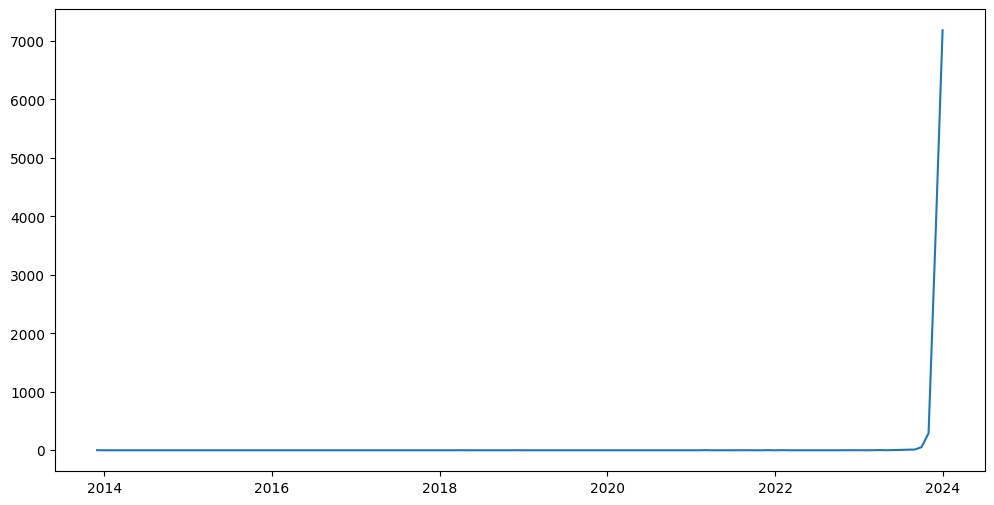

In [59]:
# Plotting
plt.figure(figsize=(12, 6))

# Plot total listings
plt.plot(monthly_listings.index, monthly_listings, label='Total Listings')

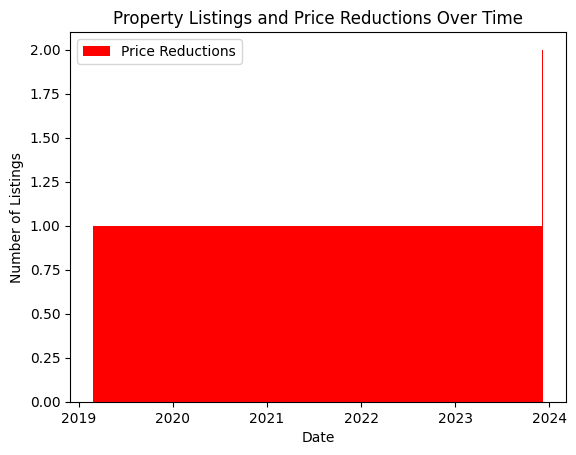

In [64]:
# Plot price reductions
plt.hist(weekly_price_reductions.index, weekly_price_reductions.index, label='Price Reductions', color='red')

plt.title('Property Listings and Price Reductions Over Time')
plt.xlabel('Date')
plt.ylabel('Number of Listings')
plt.legend()

plt.show()

# Informative Statistics

In [66]:
df['bedrooms'].value_counts()

bedrooms
2       4994
3       3340
1       3150
4       1460
0        641
5        529
6        322
7        102
8         70
9         23
10        11
11         5
75         4
16         2
14         2
20         2
24         1
1250       1
Name: count, dtype: int64

# Map

In [70]:
df['latitude'] = df['location'].apply(lambda x: x['latitude'])
df['longitude'] = df['location'].apply(lambda x: x['longitude'])

In [71]:
df

,_id,bedrooms,bathrooms,location,listingUpdate,price,firstVisibleDate,yearly_price,longitude,latitude,update_reason,update_date,date_updated,price_zscore,date,listingUpdateReason
2661,656e411a59a51e519489cf46,7,2.0,"{'latitude': 53.809399, 'longitude': -1.57461}","{'listingUpdateReason': 'new', 'listingUpdateD...","{'amount': 840, 'frequency': 'weekly'}",2023-10-05T13:03:34Z,43800.000000,-1.574610,53.809399,new,2013-11-12 11:06:33+00:00,2013-11-12 11:06:33+00:00,0.470797,2013-11-12,new
2702,656e411a59a51e519489cf6f,9,3.0,"{'latitude': 53.810341, 'longitude': -1.56594}","{'listingUpdateReason': 'new', 'listingUpdateD...","{'amount': 1161, 'frequency': 'weekly'}",2023-10-05T12:15:17Z,60537.857143,-1.565940,53.810341,new,2013-11-12 11:06:41+00:00,2013-11-12 11:06:41+00:00,0.783798,2013-11-12,new
3616,656e414959a51e519489d301,3,0.0,"{'latitude': 50.832448, 'longitude': -0.140937}","{'listingUpdateReason': 'new', 'listingUpdateD...","{'amount': 2750, 'frequency': 'monthly'}",2018-03-06T10:39:49Z,33000.000000,-0.140937,50.832448,new,2018-03-06 10:39:53+00:00,2018-03-06 10:39:53+00:00,0.268836,2018-03-06,new
9419,656e4b226dd8c4d016b3d810,3,2.0,"{'latitude': 50.7257, 'longitude': -2.93256}","{'listingUpdateReason': 'new', 'listingUpdateD...","{'amount': 1750, 'frequency': 'weekly'}",2023-11-16T10:36:57Z,91250.000000,-2.932560,50.725700,new,2018-11-27 12:19:22+00:00,2018-11-27 12:19:22+00:00,1.358121,2018-11-27,new
8612,656e4afc6dd8c4d016b3d4e9,5,5.0,"{'latitude': 53.56278, 'longitude': -1.1853}","{'listingUpdateReason': 'price_reduced', 'list...","{'amount': 115, 'frequency': 'weekly'}",2018-12-28T10:24:06Z,5996.428571,-1.185300,53.562780,price_reduced,2019-02-21 09:34:13+00:00,2019-02-21 09:34:13+00:00,-0.236136,2019-02-21,price_reduced
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
14405,65749102d83a1b4c1f493c75,1,0.0,"{'latitude': 53.70571, 'longitude': -2.63484}","{'listingUpdateReason': 'new', 'listingUpdateD...","{'amount': 600, 'frequency': 'monthly'}",2023-12-09T15:59:30Z,7200.000000,-2.634840,53.705710,new,2023-12-09 16:05:04+00:00,2023-12-09 16:05:04+00:00,-0.213629,2023-12-09,new
2334,656e410059a51e519489cdff,3,2.0,"{'latitude': 51.559717, 'longitude': -0.280613}","{'listingUpdateReason': None, 'listingUpdateDa...","{'amount': 3551, 'frequency': 'monthly'}",2023-10-05T06:58:42Z,42612.000000,-0.280613,51.559717,None,NaT,NaT,0.448582,NaT,None
4537,656e4a346dd8c4d016b3c4fe,2,1.0,"{'latitude': 54.974093, 'longitude': -2.108544}","{'listingUpdateReason': None, 'listingUpdateDa...","{'amount': 675, 'frequency': 'monthly'}",2023-12-04T21:48:29Z,8100.000000,-2.108544,54.974093,None,NaT,NaT,-0.196799,NaT,None
12730,656f216dfbdbc9919e0481fc,2,1.0,"{'latitude': 56.81097, 'longitude': -2.65675}","{'listingUpdateReason': None, 'listingUpdateDa...","{'amount': 725, 'frequency': 'monthly'}",2023-12-05T13:07:05Z,8700.000000,-2.656750,56.810970,None,NaT,NaT,-0.185579,NaT,None


# Dashboard